In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
# Ignore all wa)rnings .
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
iris_data = pd.read_csv("Iris.csv")

In [3]:
# Display the first few rows of the dataset
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Histogram function
def create_histogram(data, column_name, bins=10):
    plt.hist(data[column_name], bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()


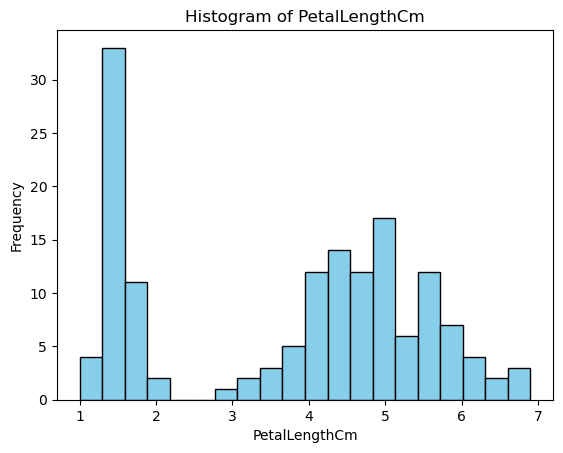

In [5]:
create_histogram(iris_data, 'PetalLengthCm', bins=20)

In [6]:
# Line plot function
def create_line_plot(data, x_column, y_column):
    plt.plot(data[x_column], data[y_column], marker='o', linestyle='-')
    plt.title(f'Line Plot: {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.grid(True)
    plt.show()

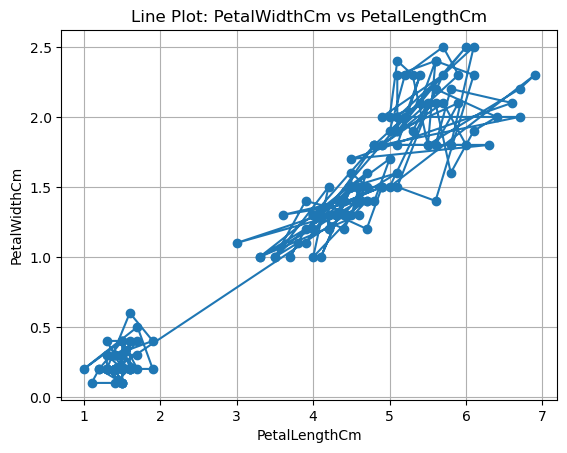

In [7]:
create_line_plot(iris_data, 'PetalLengthCm', 'PetalWidthCm')

In [8]:
# Scatter plot function
def create_scatter_plot(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_column, y=y_column, data=data, color='purple')
    plt.title(f'{x_column} vs. {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

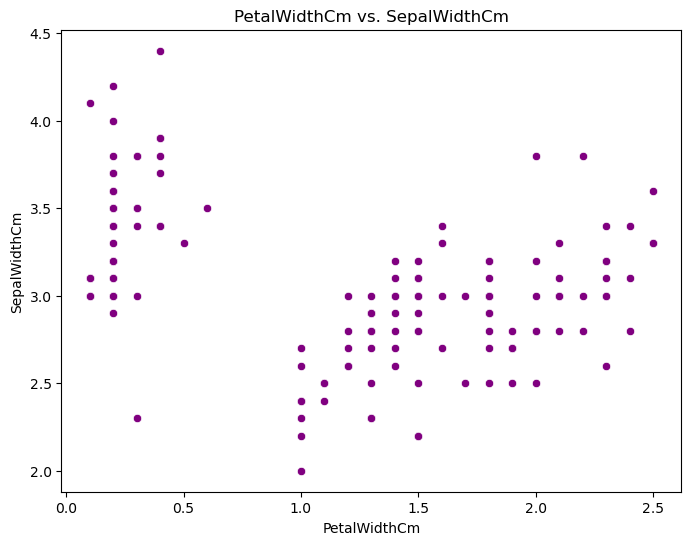

In [9]:
create_scatter_plot(iris_data, 'PetalWidthCm', 'SepalWidthCm')

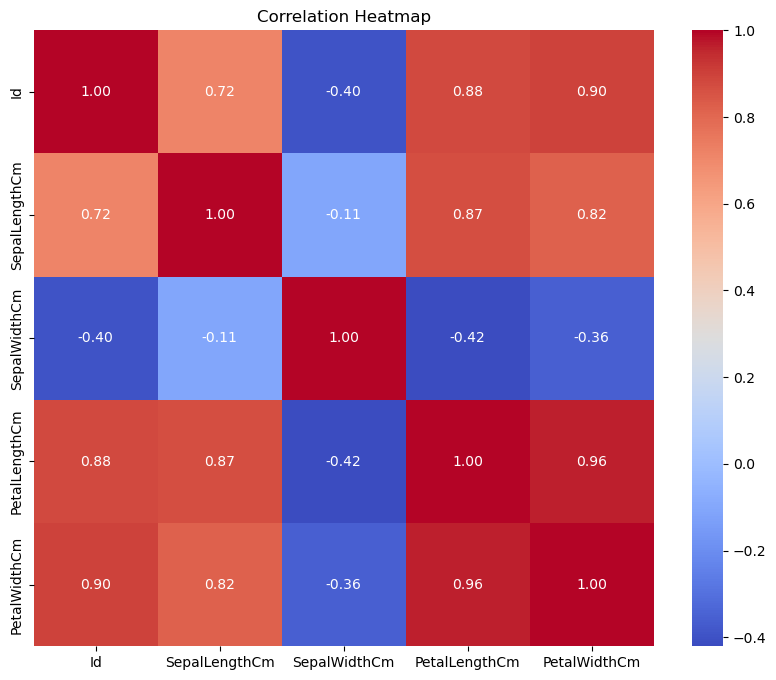

In [10]:
# Heatmap function
def create_heatmap(data):
    # Selecting only numeric columns
    numeric_data = data.select_dtypes(include='number')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
# Example usage with Iris dataset
create_heatmap(iris_data)

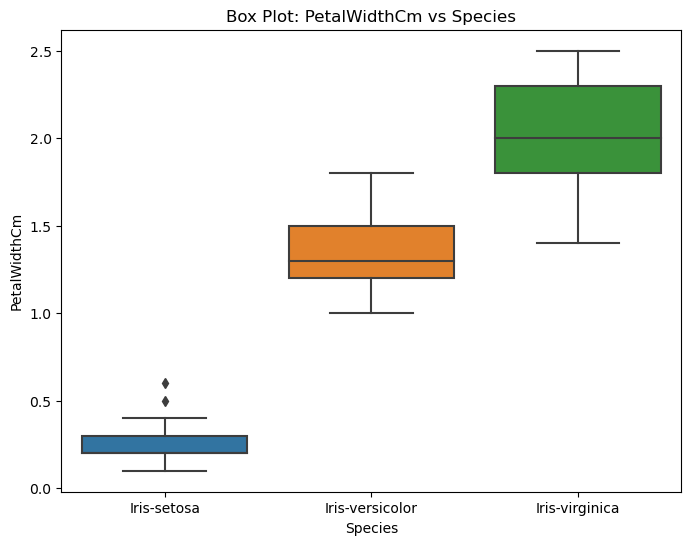

In [11]:
# Box plot function
def create_box_plot(data, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x_column, y=y_column, data=data)
    plt.title(f'Box Plot: {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example usage with Iris dataset
create_box_plot(iris_data, 'Species', 'PetalWidthCm')


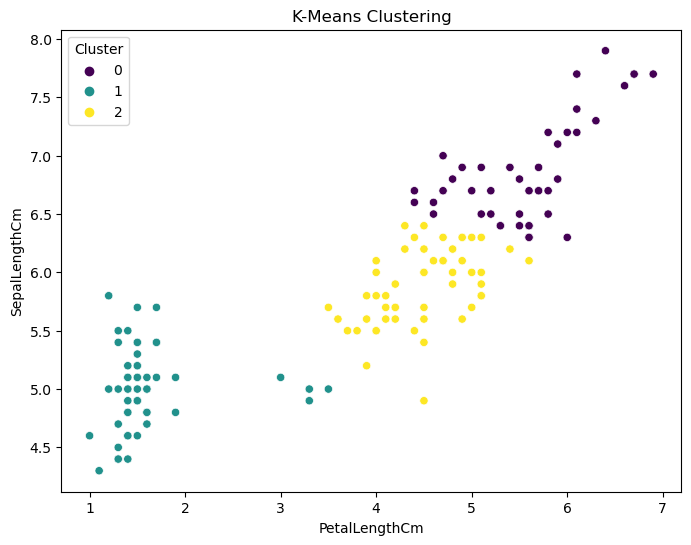

In [13]:
def kmeans_clustering_visualization(data, features, n_clusters=3):
    """
    Perform K-Means clustering on the given data and visualize the clustering results.

    Parameters:
        data (DataFrame): The input dataset.
        features (list): List of feature columns to be used for clustering.
        n_clusters (int): Number of clusters for K-Means. Default is 3.
    """
    # Select only the numeric columns
    numeric_data = data.select_dtypes(include='number')

    # Separate features
    X = data[features]

    # Data Preprocessing: Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Determine the optimal number of clusters using elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Fit k-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)

    # Add cluster labels to the dataset
    data['Cluster'] = kmeans.labels_

    # Visualize clustering results (scatter plot)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=features[0], y=features[1], hue='Cluster', data=data, palette='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

# Example usage with Iris dataset
kmeans_clustering_visualization(iris_data, ['PetalLengthCm', 'SepalLengthCm'])


In [14]:
def plot_elbow_method(X_scaled, max_clusters=10):
    """
    Plot the elbow method to determine the optimal number of clusters.

    Parameters:
        X_scaled (array-like): Scaled feature matrix.
        max_clusters (int): Maximum number of clusters to consider. Default is 10.
    """
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()




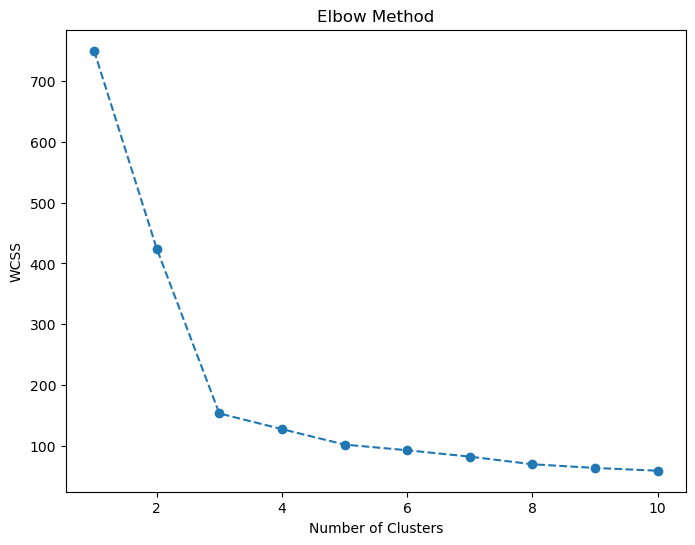

In [15]:
# Assuming X is defined with appropriate feature values
X = iris_data.drop(['Id', 'Species'], axis=1)

# Data Preprocessing: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Example usage of plot_elbow_method
plot_elbow_method(X_scaled)


In [16]:
def plot_silhouette_score(X_scaled, max_clusters=10):
    """
    Plot the silhouette score for different numbers of clusters.

    Parameters:
        X_scaled (array-like): Scaled feature matrix.
        max_clusters (int): Maximum number of clusters to consider. Default is 10.
    """
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()


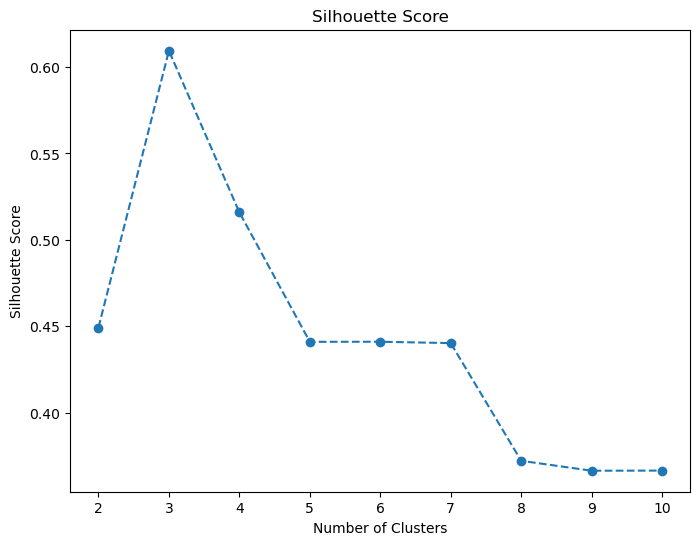

In [17]:
plot_silhouette_score(X_scaled)

In [18]:
#Descriptive Statistics
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.066667
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.799888
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
# Compute the correlation matrix
numeric_cols = iris_data.select_dtypes(include='number') 
correlation_matrix = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   
Cluster       -0.127270      -0.425906     -0.308453      -0.184920   

               PetalWidthCm   Cluster  
Id                 0.899759 -0.127270  
SepalLengthCm      0.817954 -0.425906  
SepalWidthCm      -0.356544 -0.308453  
PetalLengthCm      0.962757 -0.184920  
PetalWidthCm       1.000000 -0.201050  
Cluster           -0.201050  1.000000  
